In [6]:
import os
import zipfile

archive_path = '/content/drive/MyDrive/Datasets/SOURCE1/by_class.zip'
with zipfile.ZipFile(archive_path, 'r') as arc_f:
  arc_f.extractall('/content/')

In [7]:
from PIL import Image
import numpy as np
import cv2

def get_grayscale_image(filepath):
  img = Image.open(filepath).convert('L')
  return np.array(img)

def crop_grayscale(img):
  _, bin_img = cv2.threshold(img, 128, 255, type=cv2.THRESH_BINARY_INV)
  contours, _ = cv2.findContours(bin_img, mode=cv2.RETR_EXTERNAL,
                              method=cv2.CHAIN_APPROX_SIMPLE)

  if not contours:
    return img

  y_min, y_max, x_min, x_max = np.inf, -np.inf, np.inf, -np.inf

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    y_min = min(y, y_min)
    y_max = max(y+h, y_max)
    x_min = min(x, x_min)
    x_max = max(x+w, x_max)

  croppped_img = bin_img[y_min:y_max, x_min:x_max]

  return croppped_img

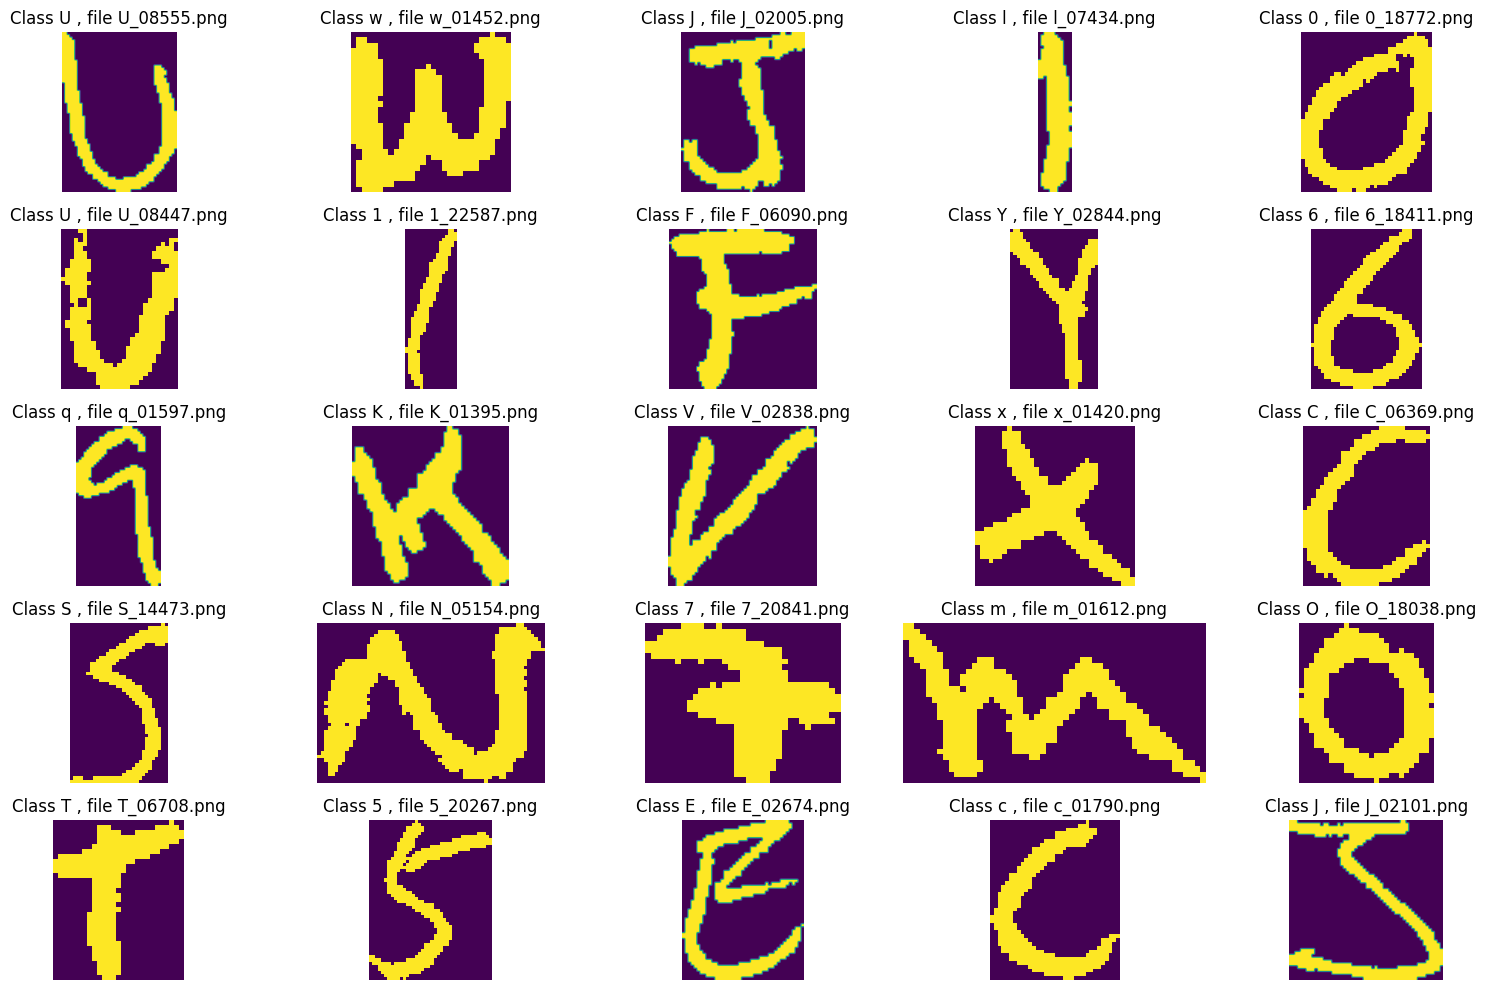

In [8]:
import matplotlib.pyplot as plt
import random

char_classes = os.listdir('/content/by_class/test')
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))

for i in range(rows):
  for j in range(cols):
    chosen_class = random.choice(char_classes)
    class_dir = os.path.join('/content/by_class/test', chosen_class)

    chosen_file = random.choice(os.listdir(class_dir))
    filepath = os.path.join(class_dir, chosen_file)


    if os.path.isfile(filepath):
      img = get_grayscale_image(filepath)
      cropped = crop_grayscale(img)

      axes[i, j].imshow(cropped)
      axes[i, j].set_title(f'Class {chosen_class} , file {chosen_file}')
      axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [9]:
cropped_filepath = '/content/drive/MyDrive/Datasets/SOURCE1/cropped/cropped_test_classes.txt'
with open(cropped_filepath, 'w') as c_f:
  pass

print(char_classes)

['R', 'A', 'c', 'x', 'l', 'M', 'L', 'w', 'j', 'g', 'Y', '7', 'X', 'v', 'e', 'F', 'm', '0', 'D', 'd', 'b', 'G', 'u', 'E', '9', 'T', 'C', 'W', '8', 'o', '2', '3', 'p', 'P', '5', 'B', 't', 'f', 'H', 'k', 'K', 'I', '4', 'N', 'Q', 'y', 'a', 'S', '6', 'h', 'U', '1', 'O', 'J', 'n', 'z', 'V', 'r', 'q', 'i', 'Z', 's']


In [10]:
out_dir = '/content/drive/MyDrive/Datasets/SOURCE1/cropped/'
os.makedirs(os.path.join(out_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(out_dir, 'test'), exist_ok=True)

for idx in range(len(char_classes)):
  os.makedirs(os.path.join(out_dir, 'train', char_classes[idx]), exist_ok=True)
  os.makedirs(os.path.join(out_dir, 'test', char_classes[idx]), exist_ok=True)


for c_idx in range(len(char_classes)):
  class_dir = os.path.join('/content/by_class/test', char_classes[c_idx])

  out_class_dir = os.path.join(out_dir, 'test', char_classes[c_idx])

  cls_images = os.listdir(class_dir)

  for im_idx in range(len(cls_images)):
    filepath = os.path.join(class_dir, cls_images[im_idx])
    out_filepath = os.path.join(out_class_dir, cls_images[im_idx])
    if not os.path.exists(out_filepath):
      img = get_grayscale_image(filepath)
      cropped = crop_grayscale(img)

      cv2.imwrite(out_filepath, cropped)

  with open(cropped_filepath, 'a') as c_f:
    c_f.write(f"{char_classes[c_idx]}\n")